In [102]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family': "Ubuntu Mono"})
plt.rcParams.update({'font.size': 15})

In [103]:
resolution = 500
cycles = 5

In [104]:
# Set up the time and signal arrays
time = np.arange(0, resolution)
signal = np.sin(1 / resolution * cycles * 2 * np.pi * time)
threshold = 1.5 * np.ones(time.shape)

In [105]:
def produce_threshold_output(noise_magnitude):
  noisy_signal = signal + noise_magnitude * np.random.randn(resolution)
  thresholded_signal = noisy_signal > threshold
  return noisy_signal, thresholded_signal

In [106]:
def plot_output(noisy_signal, thresholded_signal):
  # Create a subplot
  fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 4]})
  fig.set_size_inches(6, 6)

  # Plot the upper graph
  thresholded_signal_line, = axs[0].plot(time, thresholded_signal, color='blue', label='Thresholded Signal')
  axs[0].set_ylim(-0.1, 1.1)
  axs[0].get_xaxis().set_visible(False)

  # Plot the lower graph
  noisy_signal_line, = axs[1].plot(time, noisy_signal, color='black', label='Noisy signal')
  noiseless_signal_line, = axs[1].plot(time, signal, color='red', label='Noiseless signal')
  threshold_line, = axs[1].plot(time, threshold, color='green', label='Threshold')
  axs[1].set_ylim(-2, 2)
  axs[1].get_xaxis().set_visible(False)
  axs[1].get_yaxis().set_visible(False)

  # Set up the legend
  axs[1].legend([noiseless_signal_line, noisy_signal_line, threshold_line, thresholded_signal_line], ['Noiseless signal', 'Noisy signal', 'Threshold', 'Thresholded Signal'], loc='lower right')

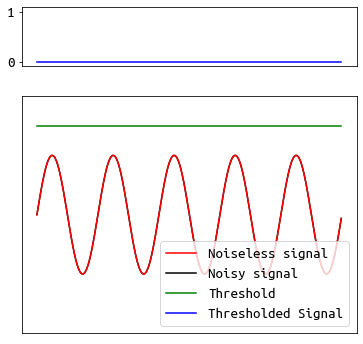

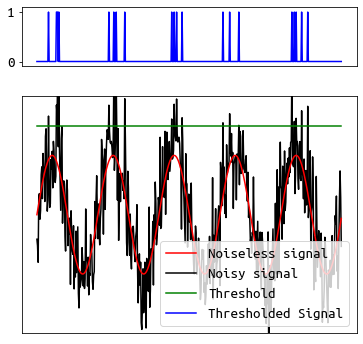

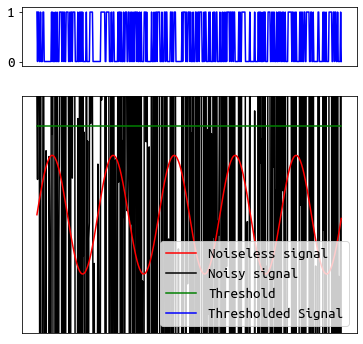

In [107]:
# Generate three example noisy plot
plot_output(*produce_threshold_output(0))
plot_output(*produce_threshold_output(0.5))
plot_output(*produce_threshold_output(10))

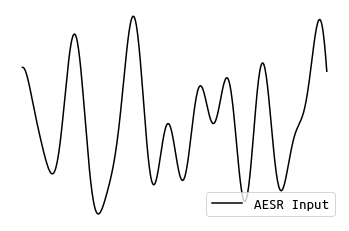

In [163]:
# Set up an arbitrary signal array composed of multiple sine waves
signal = np.zeros(time.shape)

for i in range(5):
  magnitude = np.random.rand()
  frequency = np.random.rand() * 2
  phase = np.random.rand() * 2 * np.pi
  signal += magnitude * np.sin(1 / resolution * cycles * 2 * np.pi * time * frequency + phase)

plt.plot(time, signal, label="AESR Input", color="black")
plt.legend(loc='lower right')
plt.axis('off')
plt.show()

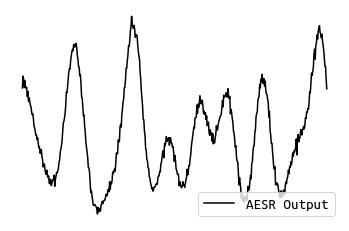

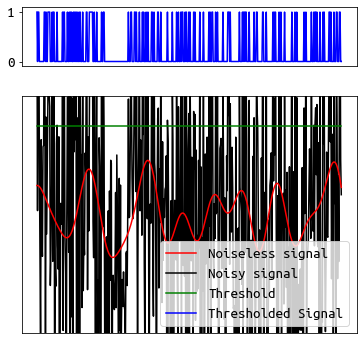

In [164]:
samples = 10000
averaged_thresholded_signal = np.zeros(time.shape)

for i in range(samples):
  noisy, thresholded_signal = produce_threshold_output(2)
  averaged_thresholded_signal += thresholded_signal

# Plot the averaged thresholded signal
plt.plot(time, averaged_thresholded_signal, color='black', label=f"AESR Output ({samples} samples)")
plt.legend(loc='lower right')
plt.axis('off')
plt.show()

plot_output(*produce_threshold_output(2))